In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import spearmanr, pearsonr, kendalltau
import numpy as np

def plot_pairwise_density(
    y_pred,
    y_true,
    title="",
    cmap="Blues",
    alpha=1.0,
    cbar=False,
    draw_active_lines=True,
    label_fpr=False,
    label_tpr=False,
    threshold=6.0,
    show_scatter=False,
    scatter_color="#DA5168",
    show_pearson=False,
    figsize=(5, 5),
):
    rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))
    pearson = pearsonr(y_pred, y_true)[0]
    spearman = spearmanr(y_pred, y_true)[0]
    kendall = kendalltau(y_pred, y_true)[0]

    fig = plt.figure(figsize=figsize)
    sns.kdeplot(x=y_true, y=y_pred, cmap=cmap, fill=True, alpha=alpha, cbar=cbar)
    plt.plot([3, 11], [3, 11], color="black", linestyle="--", linewidth=0.5)
    plt.plot([], [], label=f"RMSE = {round(rmse,3)}", color="darkblue")
    if show_pearson:
        plt.plot([], [], label=f"Pearson = {round(pearson,3)}", color="darkblue")
    plt.plot([], [], label=f"Spearman = {round(spearman,3)}", color="darkblue")
    # plt.plot([], [], label=f"Kendall = {round(kendall,2)}", color="darkblue")
    plt.legend(
        loc="upper center",
        ncol=4,
        title_fontsize=8,
        fontsize=13,
        handlelength=0.0,
        shadow=False,
        fancybox=True,
        framealpha=1.0,
    )
    if label_fpr:
        neg_ix = np.argwhere(y_true < threshold)
        y_pred_neg = y_pred[neg_ix]
        fpr = len(y_pred_neg[y_pred_neg >= threshold]) / len(y_pred_neg)
        plt.text(
            3.5,
            8.5,
            f"FPR = {round(fpr,2)}",
            horizontalalignment="left",
            size="medium",
            color="indianred",
            weight="semibold",
        )
    if label_tpr:
        pos_ix = np.argwhere(y_true >= threshold)
        y_pred_pos = y_pred[pos_ix]
        tpr = len(y_pred_pos[y_pred_pos >= threshold]) / len(y_pred_pos)
        plt.text(
            6.5,
            8.5,
            f"TPR = {round(tpr,2)}",
            horizontalalignment="left",
            size="medium",
            color="indianred",
            weight="semibold",
        )

    if show_scatter:
        plt.scatter(y_true, y_pred, s=5, color="#E96274")

    if draw_active_lines:
        plt.hlines(threshold, 3, 11, linestyle="--", color="indianred")
        plt.vlines(threshold, 3, 11, linestyle="--", color="indianred")
    plt.ylabel(r"Predicted pIC$_{50}$", fontsize=20)
    plt.xlabel(r"Measured pIC$_{50}$", fontsize=20)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(3.5, 10)
    plt.ylim(3.5, 10)
    plt.title(f"{title}", fontsize=14)
    return fig


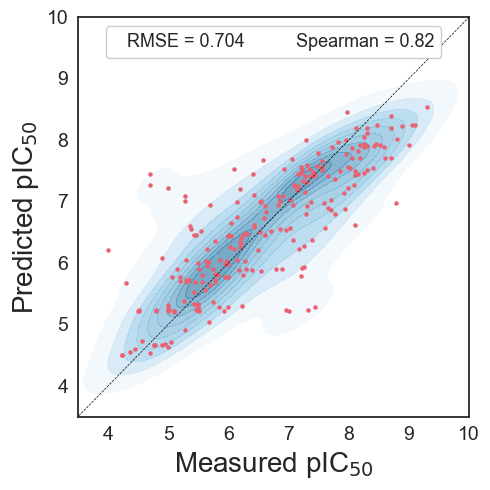

In [8]:
import pandas as pd 
from matplotlib import rc 
import matplotlib.colors 
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 1.3

colors = ["#FFFFFF","#9BCDE9", "#7DB6D6", "#337CA7"] #["#B3E1F8", "#A9D9F2", "#9BCDE9", "#8CC2E0", "#7DB6D6", "#6EAACD", "#609FC3", "#5193BA", "#4288B0","#337CA7"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
sns.set_style("white")

#rc('font',**{'family':'serif'})
data = pd.read_csv("test_predictions_sd_rfr.csv")

y_pred = data["y_pred"].to_numpy()
y_true = data["y_true"].to_numpy()
#cmap = sns.light_palette("royalblue", as_cmap=True)
fig = plot_pairwise_density(y_pred, y_true, show_scatter=True, cmap=cmap, alpha=0.7, draw_active_lines=False)#, title="POC to pIC50 Random Forest Model\nTest Set Predictions")
# sns.regplot(x=y_true, y=y_pred)
# plt.plot([4,9.], [4,9.], linestyle='--', color='black')
# plt.xlabel("Measured Activity", fontsize=14)
# plt.ylabel("Predicted Activity", fontsize=14)
plt.tight_layout()
fig.savefig("poc_to_ic50_scatter_bigger.svg", format="svg")
plt.show()